<a href="https://colab.research.google.com/github/rohitkhadka1/NLP/blob/main/word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import os

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("datatattle/covid-19-nlp-text-classification")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/covid-19-nlp-text-classification


## Importing the Dataset + Text Preprocessing

In [ ]:
!pip install pandas==1.5.3 --force-reinstall --no-cache-dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 125.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 279.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 214.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 336.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 371.9 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successfully uninstalled pytz-2025.2
  Attempting uninstall: six
    Found existing installation: six 1.17.0
    Uninstalling six-1.17.0:
      Successfully uninstalled six-1.17.0
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4
  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.8.2
    Uninstalling python-dateutil-2.8.2:
      Successfully unins

In [ ]:
predata = os.path.join(path, 'Corona_NLP_train.csv')
dataset = pd.read_csv(predata, encoding='latin1', dtype = str)

TypeError: Cannot convert numpy.ndarray to numpy.ndarray

In [ ]:
dataset.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


Very basic text preproccessing by removing punctuations, numbers. We have also cleaned the data by removing characters including and after 'https' in the text.

In [ ]:
import re
texts=[]
for i in range(0,len(dataset)):
  text = re.sub('[^a-zA-Z]' , ' ', dataset['OriginalTweet'][i])
  text = text.lower()
  text = text.split()
  x = len(text) if text.count('https') ==0  else text.index('https')
  text = text[: x ]
  text = [t for t in text if not t=='https']
  text = ' '.join(text)
  texts.append(text)


Size of the dataset.

In [ ]:
print(len(texts))

41157


## Training the word2vec model

In [ ]:
!pip install gensim

  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.5.1 requires nu

In [ ]:
!pip install numpy==1.23.5 --force-reinstall --no-cache-dir

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 301.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
blosc2 3.3.0 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.

In [ ]:
!pip install scipy --upgrade --force-reinstall --no-cache-dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 76.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 121.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 304.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 133.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.2 which is incompatible.
tensorflow 2.18.0 

In [ ]:
from gensim.models import Word2Vec


In [ ]:
sentences = [line.split() for line in texts]

w2v =Word2Vec(sentences, size=100, window=5, workers=4, iter=10, min_count=5)

NameError: name 'texts' is not defined

In [ ]:
print(sentences[20:25])

[['with', 'nations', 'inficted', 'with', 'covid', 'the', 'world', 'must', 'not', 'play', 'fair', 'with', 'china', 'goverments', 'must', 'demand', 'china', 'adopts', 'new', 'guilde', 'lines', 'on', 'food', 'safty', 'the', 'chinese', 'goverment', 'is', 'guilty', 'of', 'being', 'irosponcible', 'with', 'life', 'on', 'a', 'global', 'scale'], [], ['we', 'have', 'amazing', 'cheap', 'deals', 'for', 'the', 'covid', 'going', 'on', 'to', 'help', 'you', 'trials', 'monthly', 'yearly', 'and', 'resonable', 'prices', 'subscriptions', 'just', 'dm', 'us', 'bestiptv', 'iptv', 'service', 'iptv', 'iptvdeals', 'cheap', 'iptv', 'football', 'hd', 'movies', 'adult', 'cinema', 'hotmovies', 'iptvnew', 'iptv', 'adult'], ['we', 'have', 'amazing', 'cheap', 'deals', 'for', 'the', 'covid', 'going', 'on', 'to', 'help', 'you', 'trials', 'monthly', 'yearly', 'and', 'resonable', 'prices', 'subscriptions', 'just', 'dm', 'us', 'bestiptv', 'iptv', 'service', 'iptv', 'iptvdeals', 'cheap', 'iptv', 'football', 'hd', 'movies', 

## Working with word2vec

Finding the vocabulary of the model can be useful in several general applications, and in this case, provides us with a list of words we can try and use other functions.

In [ ]:
words = list(w2v.wv.vocab)


In [ ]:
print(words)

['phil', 'advice', 'talk', 'to', 'your', 'neighbours', 'family', 'exchange', 'phone', 'numbers', 'create', 'contact', 'list', 'with', 'of', 'schools', 'employer', 'chemist', 'gp', 'set', 'up', 'online', 'shopping', 'accounts', 'if', 'adequate', 'supplies', 'regular', 'meds', 'but', 'not', 'over', 'order', 'coronavirus', 'australia', 'woolworths', 'give', 'elderly', 'disabled', 'dedicated', 'hours', 'amid', 'covid', 'outbreak', 'my', 'food', 'stock', 'is', 'the', 'only', 'one', 'which', 'empty', 'please', 'don', 't', 'panic', 'there', 'will', 'be', 'enough', 'for', 'everyone', 'you', 'do', 'take', 'more', 'than', 'need', 'stay', 'calm', 'safe', 'france', 'confinement', 'me', 'ready', 'go', 'at', 'supermarket', 'during', 'because', 'i', 'm', 'paranoid', 'a', 'serious', 'thing', 'it', 'causes', 'shortage', 'stayathome', 'as', 'news', 'region', 's', 'first', 'confirmed', 'case', 'came', 'out', 'county', 'last', 'week', 'people', 'area', 'stores', 'purchase', 'cleaning', 'hand', 'sanitizer'

In [ ]:
print(len(words))

10630


Finding the embedding of a given word can be useful when we’re trying to represent sentences as a collection of word embeddings, like when we’re trying to make a weight matrix for the embedding layer of a network.

In [ ]:
print( w2v.wv['computer'] )

[ 1.57469660e-01  1.40157074e-01 -3.25907797e-01 -6.61702231e-02
  3.14891905e-01  6.28795177e-02 -4.47840840e-02  4.59685735e-02
  2.28131562e-02  2.39715233e-01  2.16640569e-02  7.56994933e-02
  7.25479275e-02 -2.12595508e-01 -3.17018256e-02  1.75617978e-01
  1.16614237e-01  1.87761128e-01 -5.23434877e-02  1.26436412e-01
  1.70193449e-01 -1.07564844e-01  7.81135038e-02  2.12555289e-01
 -5.70309162e-02  9.05565321e-02 -1.88474759e-01  9.64211822e-02
  3.91710252e-02 -1.95013254e-03 -3.80934596e-01  2.09646896e-01
 -9.98702249e-04  9.41597596e-02 -1.42464504e-01 -1.65631194e-02
 -7.55091384e-02  8.67938846e-02  1.08608618e-01  4.55869362e-02
  4.33201902e-02  1.76215306e-01 -5.83453756e-03 -2.22821414e-01
  1.07587561e-01 -2.81930178e-01  9.92109030e-02  5.60606346e-02
 -1.21222138e-01 -2.12018788e-01  4.72052723e-01 -3.12591828e-02
 -5.42412922e-02 -7.44261965e-02  3.52113754e-01 -1.90538943e-01
 -7.09711239e-02  1.26500160e-01 -8.27063695e-02 -2.49383450e-01
  3.60160917e-01 -4.97583

We can also find out the similarity between given words (the cosine distance between their vectors).

In [ ]:
w2v.wv.similarity('vladimir', 'putin')

0.81842446

In [ ]:
w2v.wv.similarity('vladimir', 'modi')

0.6622772

With the gensim, we can also find the most similar words to a given word.

In [ ]:
print(w2v.wv.most_similar('pay'))

[('paying', 0.7022949457168579), ('paid', 0.686174213886261), ('wages', 0.6507245898246765), ('bills', 0.6483527421951294), ('receive', 0.6030805110931396), ('leave', 0.6017082333564758), ('raise', 0.5998932123184204), ('rent', 0.594900369644165), ('wage', 0.569133996963501), ('benefits', 0.5625671148300171)]


In [ ]:
print(w2v.wv.most_similar('covid'))

[('coronavirus', 0.6034492254257202), ('virus', 0.5288746953010559), ('corona', 0.5067222118377686), ('disease', 0.47963017225265503), ('coronacrisis', 0.4596719741821289), ('epidemic', 0.4517126977443695), ('coronavirusindia', 0.45097070932388306), ('flattenthecurve', 0.4467395842075348), ('coronaviruschallenge', 0.44602638483047485), ('corvid', 0.44361186027526855)]


In [ ]:
print(w2v.wv.most_similar('india'))

[('nigeria', 0.7527592182159424), ('pakistan', 0.7506697177886963), ('kenya', 0.6827074885368347), ('amitshah', 0.6763262748718262), ('odisha', 0.6750248670578003), ('iran', 0.6640534400939941), ('drharshvardhan', 0.6618179082870483), ('irvpaswan', 0.6575825214385986), ('kuwait', 0.6487914323806763), ('pmoindia', 0.6474971175193787)]


Similarly, we can use the same function to find analogies of the form: if x:y, then z:?. Here we enter the known relation x,y in the positive parameter, and the term who’s analogy has to be found in the negative parameter.

In [ ]:
print(w2v.wv.most_similar(positive=['russian', 'russia'], negative=['arab']))

[('saudi', 0.7981306314468384), ('arabia', 0.773565411567688), ('putin', 0.7352633476257324), ('opec', 0.7199183702468872), ('trump', 0.7061201333999634), ('iran', 0.6621144413948059), ('saudis', 0.635714590549469), ('war', 0.622955322265625), ('donald', 0.6209783554077148), ('mbs', 0.6009782552719116)]


We also have this method which works similar to an "odd one out" situation.

In [ ]:
w2v.wv.doesnt_match(['grocery', 'covid', 'coronavirus'])


/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'grocery'

## Visualising word vectors

Word2Vec word embedding can usually be of sizes 100 or 300, and it is practically not possible to visualise a 300 or 100 dimensional space with meaningful outputs. I used this [snippet](http://web.stanford.edu/class/cs224n/materials/Gensim%20word%20vector%20visualization.html) from [Stanford’s 224n course site](http://web.stanford.edu/class/cs224n/index.html#schedule), which basically provides you the option of either using a list of words, or providing the number of random samples you want to be displayed. In either case, it uses PCA to reduce the dimensionality and represent the word through their vectors on a 2-dimensional plane. The actual values of the axis are not of concern as they do not hold any significance, rather we can use it to perceive similar vectors to be densely located with respect to each other.


In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]

    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]

    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


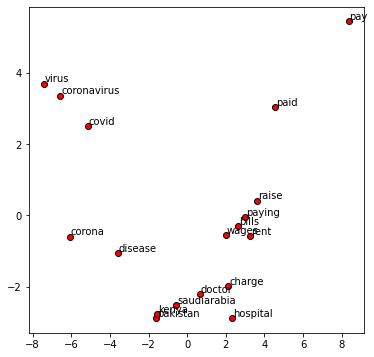

In [ ]:
display_pca_scatterplot(w2v,['coronavirus', 'covid', 'virus', 'corona','disease', 'saudiarabia',  'doctor', 'hospital', 'pakistan', 'kenya',
                             'pay', 'paying', 'paid', 'wages', 'raise', 'bills', 'rent', 'charge']  )

## Exporting pre trained embeddings + Saving/Loading our model

Gensim comes with several already pre-trained models, in the Gensim-data repository. We can import the downloader from the gensim library. We can use the following method to print the list of pre-trained models trained on large datasets available to us. This also  includes models like GloVe and fastext other than word2vec.



In [ ]:
import gensim.downloader
print(list(gensim.downloader.info()['models'].keys()))


['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


Here we have used  'word2vec-google-news-300' (trained on google-news, size is 300), and found words similar to ‘twitter’.

In [ ]:
google_news = gensim.downloader.load('word2vec-google-news-300')
google_news.most_similar('twitter')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


[('Twitter', 0.89089035987854),
 ('Twitter.com', 0.7536780834197998),
 ('tweet', 0.7431625723838806),
 ('tweeting', 0.7161933183670044),
 ('tweeted', 0.7137226462364197),
 ('facebook', 0.6988551616668701),
 ('tweets', 0.6974530816078186),
 ('Tweeted', 0.6950210928916931),
 ('Tweet', 0.6875007152557373),
 ('Tweeting', 0.6845167279243469)]

We can save our existing models and load them again.


In [ ]:
w2v.save("word2vec.model")

In [ ]:
model = Word2Vec.load("word2vec.model")
model.train([["hello", "world"]], total_examples=1, epochs=1)


(2, 2)